In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load datasets
sales_df = pd.read_csv("/home/zeal/my cute Hackathons/Layer 3.0 Apr'25/data/fmcg_sales_data.csv")
products_df = pd.read_csv("/home/zeal/my cute Hackathons/Layer 3.0 Apr'25/data/products.csv")
economic_df = pd.read_csv("/home/zeal/my cute Hackathons/Layer 3.0 Apr'25/data/economic_indicators.csv")
sentiment_df = pd.read_csv("/home/zeal/my cute Hackathons/Layer 3.0 Apr'25/data/social_sentiment.csv")

# Preview data
print(sales_df.head())
print(products_df.head())
print(economic_df.head())
print(sentiment_df.head())

    sale_id        date product_id  units_sold  revenue store_id region  \
0  S0000001  2020-01-01     P00001          76   190.00    STN01  North   
1  S0000002  2020-01-01     P00002          74   355.20    STN01  North   
2  S0000003  2020-01-01     P00003          39   153.27    STN01  North   
3  S0000004  2020-01-01     P00004          54   183.06    STN01  North   
4  S0000005  2020-01-01     P00005          54    87.48    STN01  North   

   discount_applied  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
  product_id   category  product_name  price launch_date
0     P00001  Beverages     Coca-Cola  39.00  2022-05-10
1     P00002  Beverages         Pepsi  37.47  2022-12-31
2     P00003  Beverages        Sprite  40.79  2020-05-01
3     P00004  Beverages  Orange Juice  74.50  2020-11-26
4     P00005  Beverages   Apple Juice  79.35  2023-10-28
         date       region     cpi  unemployment_rate  interest_rate  \
0  

#### Merge Sales Data with Product Metadata

In [5]:
# Merge sales data with product metadata
sales_with_products = pd.merge(sales_df, products_df, on='product_id', how='left')

# Add a new column for revenue by category
sales_with_products['revenue_by_category'] = sales_with_products['revenue']

# Group revenue by date and category
revenue_by_category = sales_with_products.groupby(['date', 'category'])['revenue'].sum().reset_index()

# Convert date to datetime format
revenue_by_category['date'] = pd.to_datetime(revenue_by_category['date'])

# Sort by date
revenue_by_category = revenue_by_category.sort_values(by='date').reset_index(drop=True)

print(revenue_by_category.head())

        date       category    revenue
0 2020-01-01      Beverages   36890.74
1 2020-01-01          Dairy   67913.47
2 2020-01-01      Household  156248.15
3 2020-01-01  Personal Care  199747.50
4 2020-01-01         Snacks   24286.95


#### Aggregate Revenue Over Time

In [6]:
# Total revenue over time
total_revenue = sales_with_products.groupby('date')['revenue'].sum().reset_index()
total_revenue['date'] = pd.to_datetime(total_revenue['date'])
total_revenue = total_revenue.sort_values(by='date').reset_index(drop=True)

# Revenue by category over time
revenue_by_category_over_time = revenue_by_category.pivot(index='date', columns='category', values='revenue').fillna(0)

#### Visualize Total Revenue Over Time

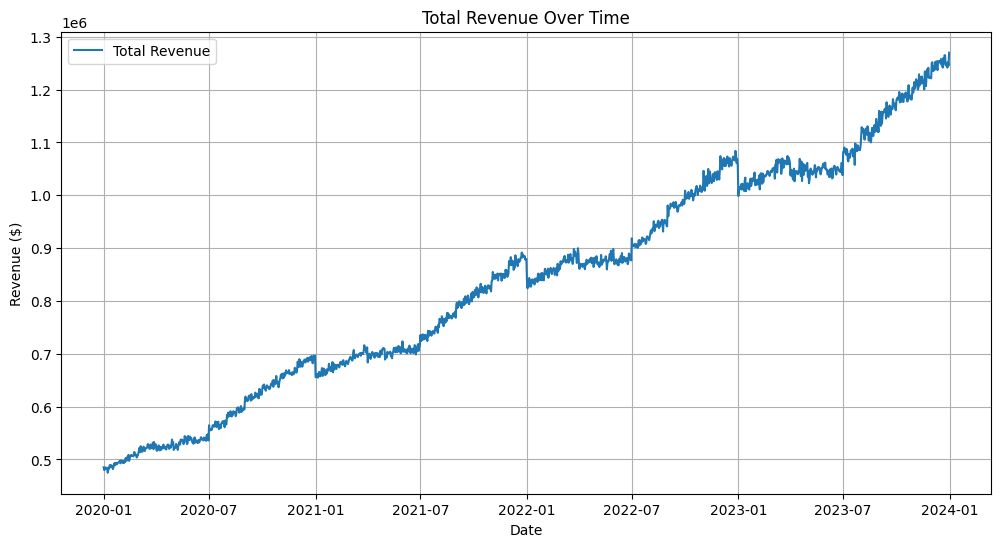

In [7]:
# Plot total revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_revenue, x='date', y='revenue', label='Total Revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid()
plt.show()

#### Visualize Revenue by Category

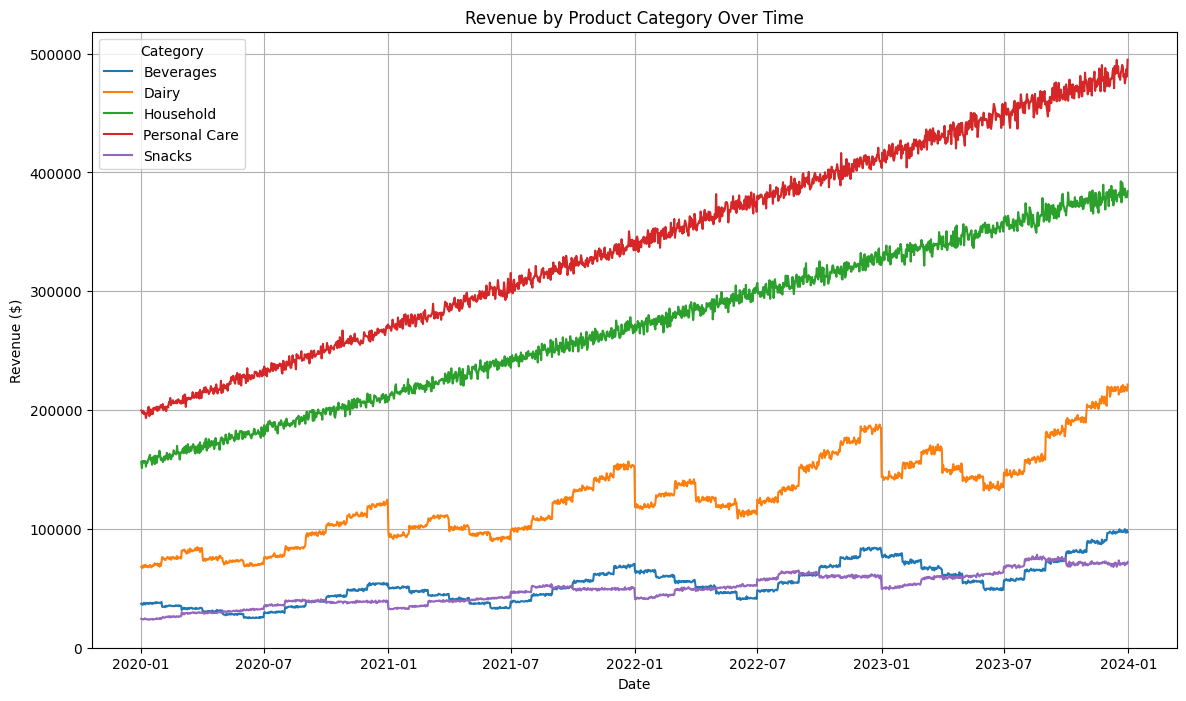

In [8]:
# Plot revenue by category over time
plt.figure(figsize=(14, 8))
for category in revenue_by_category_over_time.columns:
    sns.lineplot(data=revenue_by_category_over_time, x=revenue_by_category_over_time.index, y=category, label=category)

plt.title('Revenue by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.legend(title='Category')
plt.grid()
plt.show()

#### Correlate Revenue with Economic Indicators

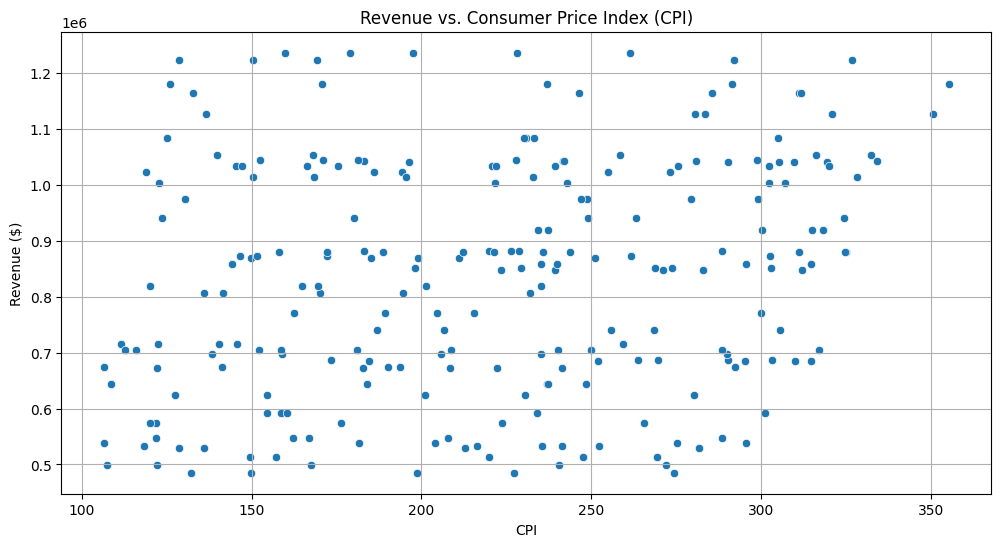

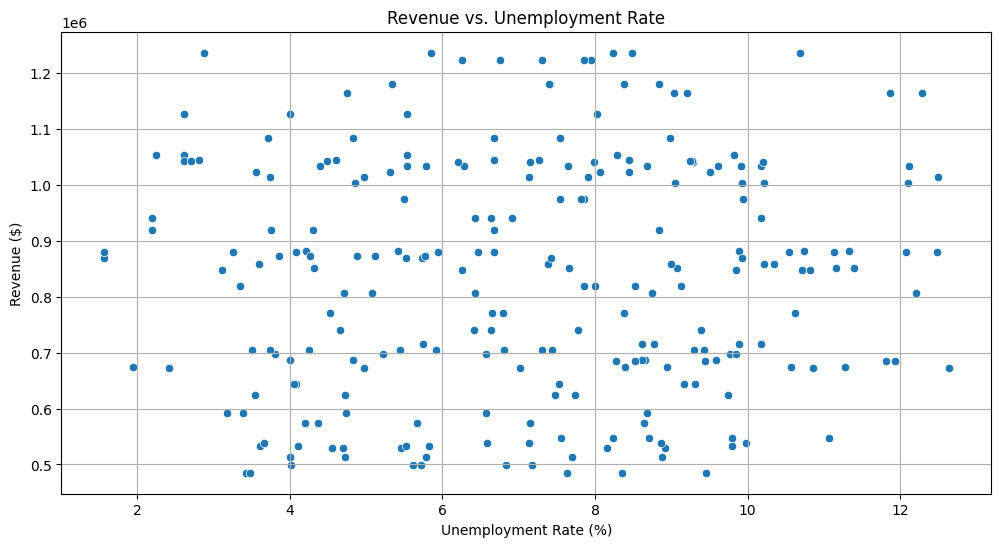

In [9]:
# Merge economic indicators with total revenue
economic_df['date'] = pd.to_datetime(economic_df['date'])
merged_data = pd.merge(total_revenue, economic_df, on='date', how='left')

# Plot revenue vs. CPI
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='cpi', y='revenue')
plt.title('Revenue vs. Consumer Price Index (CPI)')
plt.xlabel('CPI')
plt.ylabel('Revenue ($)')
plt.grid()
plt.show()

# Plot revenue vs. Unemployment Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='unemployment_rate', y='revenue')
plt.title('Revenue vs. Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Revenue ($)')
plt.grid()
plt.show()

#### Correlate Revenue with Social Sentiment

In [14]:
print("Revenue by Category:")
print(revenue_by_category.head())

print("\nSocial Sentiment Data:")
print(sentiment_df.head())

Revenue by Category:
        date       category    revenue
0 2020-01-01      Beverages   36890.74
1 2020-01-01          Dairy   67913.47
2 2020-01-01      Household  156248.15
3 2020-01-01  Personal Care  199747.50
4 2020-01-01         Snacks   24286.95

Social Sentiment Data:
        date     category  avg_sentiment  mentions  engagements
0 2020-01-01  Perishables          -0.01       464          981
1 2020-01-01  Electronics           0.25       549         2024
2 2020-01-01      Apparel          -0.31       395         1740
3 2020-01-08  Perishables           0.41       715         4620
4 2020-01-08  Electronics          -0.51       230         4069


Merged Data:
        date     category    revenue  avg_sentiment  mentions  engagements
0 2020-01-01  Perishables   36890.74          -0.01       464          981
1 2020-01-01  Perishables   67913.47          -0.01       464          981
2 2020-01-01  Electronics  156248.15           0.25       549         2024
3 2020-01-01      Apparel  199747.50          -0.31       395         1740
4 2020-01-01  Perishables   24286.95          -0.01       464          981


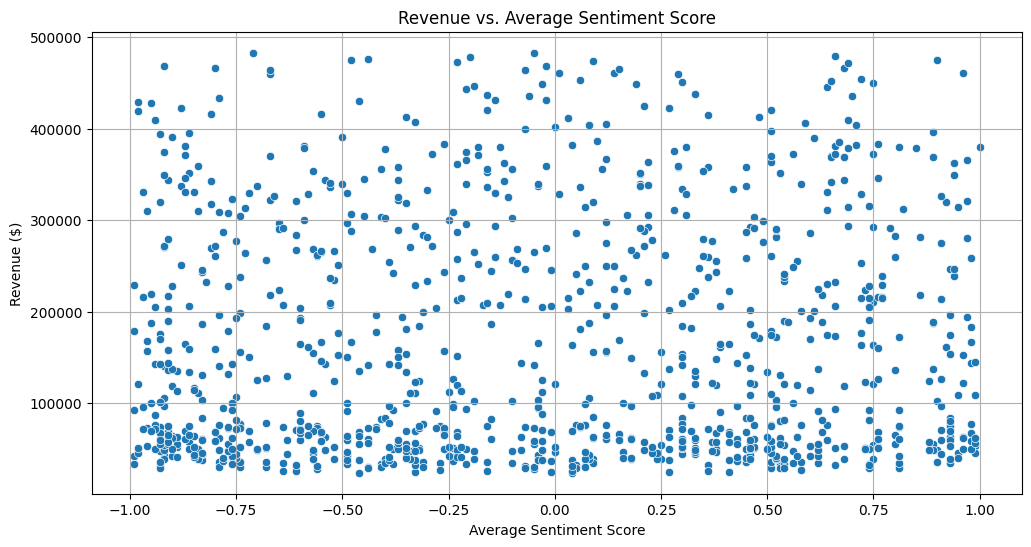

In [16]:
# Mapping between revenue categories and sentiment categories
category_mapping = {
    'Beverages': 'Perishables',
    'Dairy': 'Perishables',
    'Snacks': 'Perishables',
    'Personal Care': 'Apparel',
    'Household': 'Electronics'
}

# Map revenue categories to sentiment categories
revenue_by_category['category'] = revenue_by_category['category'].map(category_mapping)

# Merge social sentiment data with revenue by category
merged_sentiment = pd.merge(
    revenue_by_category,
    sentiment_df,
    left_on=['date', 'category'],
    right_on=['date', 'category'],
    how='inner'  # Use inner join to keep only matching rows
)

# Check the merged data
print("Merged Data:")
print(merged_sentiment.head())

# Plot revenue vs. Average Sentiment
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_sentiment, x='avg_sentiment', y='revenue')
plt.title('Revenue vs. Average Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Revenue ($)')
plt.grid()
plt.show()

#### Combine All Insights

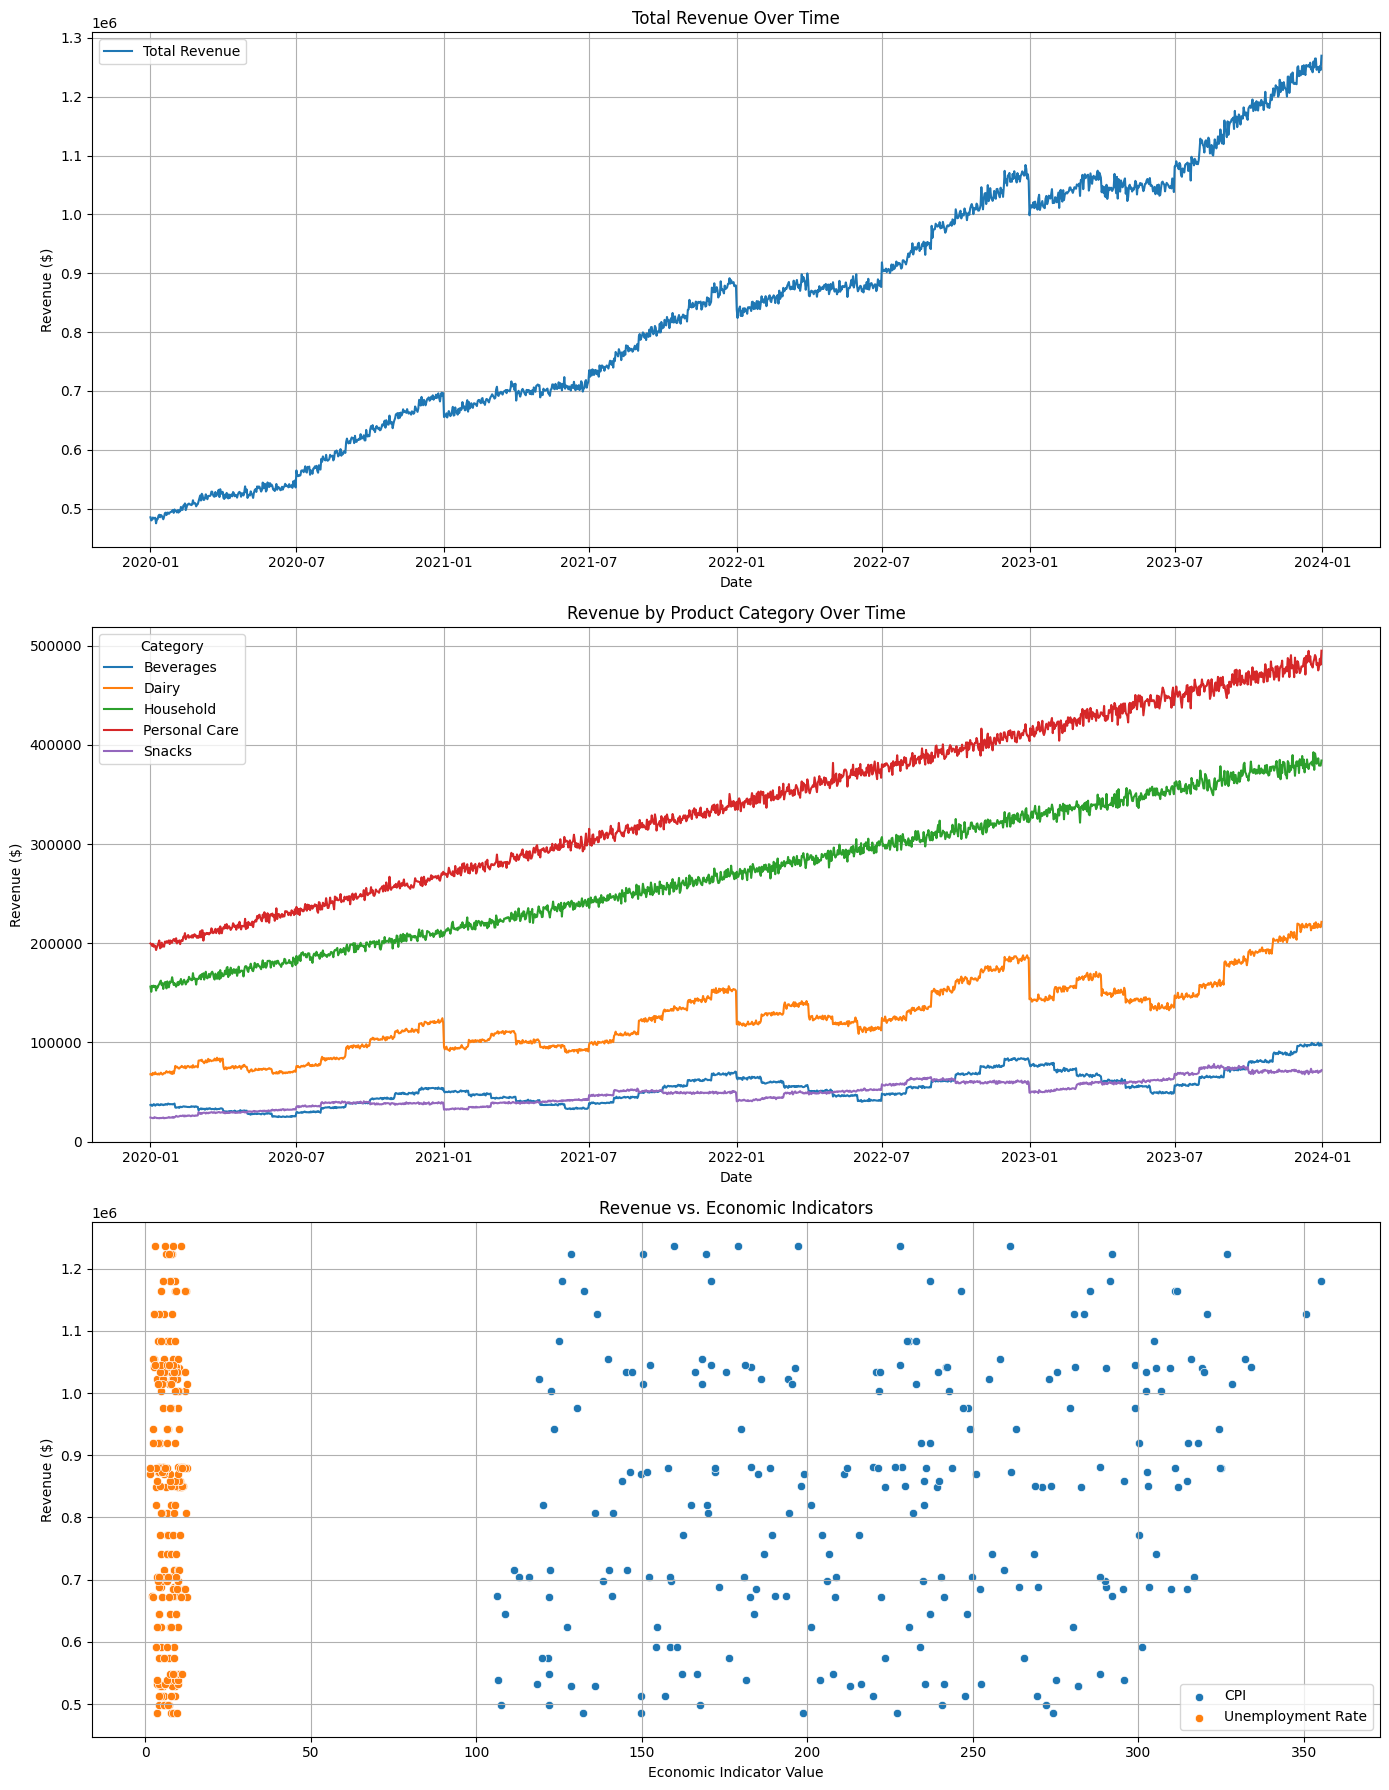

In [11]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Total Revenue Over Time
sns.lineplot(ax=axes[0], data=total_revenue, x='date', y='revenue', label='Total Revenue')
axes[0].set_title('Total Revenue Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Revenue ($)')
axes[0].grid()

# Revenue by Category Over Time
for category in revenue_by_category_over_time.columns:
    sns.lineplot(ax=axes[1], data=revenue_by_category_over_time, x=revenue_by_category_over_time.index, y=category, label=category)
axes[1].set_title('Revenue by Product Category Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Revenue ($)')
axes[1].legend(title='Category')
axes[1].grid()

# Revenue vs. Economic Indicators
sns.scatterplot(ax=axes[2], data=merged_data, x='cpi', y='revenue', label='CPI')
sns.scatterplot(ax=axes[2], data=merged_data, x='unemployment_rate', y='revenue', label='Unemployment Rate')
axes[2].set_title('Revenue vs. Economic Indicators')
axes[2].set_xlabel('Economic Indicator Value')
axes[2].set_ylabel('Revenue ($)')
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()